# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import all modules
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
display(df.head())

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1 Is the distribution of body temperatures normal?

Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

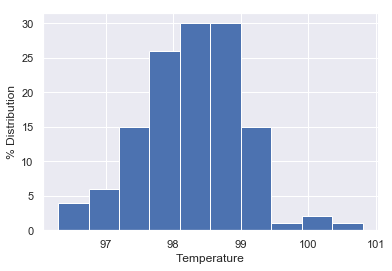

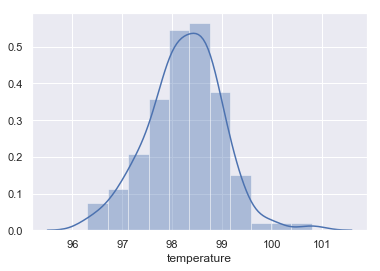

In [3]:
# Checking normality of human temperature data 
_ = plt.hist(df['temperature'])
_ = plt.xlabel ('Temperature')
_ = plt.ylabel ('% Distribution')
mean= np.mean(df['temperature'])
std= np.mean(df['temperature'])
# samples= np.random.normal (mean, std, size = 10000)
#_ = plt.hist(samples)
plt.show()
sns.distplot(df['temperature'], bins=11)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

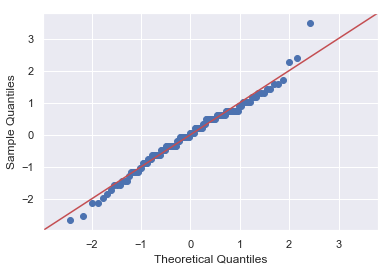

In [4]:
# Checking the qq plot and validating for normality

mean = np.mean(df['temperature'])
sd=np.std(df['temperature'])
z = (df['temperature']-mean)/sd
sm.qqplot(z,line='45')

stats.mstats.normaltest(df['temperature'])

## Normality Conclusion

The distribution of human body temperatures appears to be a normal distribution as depicted in the histogram. 
The QQ plot is also approximately normal with a right tail.
The null hypothesis in the normal test was that the distribution is normal. As the p-value is 0.25, there is not enough evidence to reject the normality (null hypothesis).

Hence, we conclude the distibution of human body temperatures can be considered approximately normal.

## 2 Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


None

There are 130 observations in the dataset. <br>
(1) Typically, we require more than 30 observations to satisfy the normal 
conditions while carrying out statistical tests of a sample distribution. Hence, sample size of 130 is large enough. <br>
(2) The observations can be considered independent as there are 130 observations 
which appears to be less than 10% of all humans considered.

## 3 Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.<br>
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? <br>
In this situation, is it appropriate to use the  tt  or  zz  statistic? <br>
Now try using the other test. How is the result be different? Why? <br>

<b>Null Hypothesis</b>: The mean of human body temperature is 98.6  <br>
<b>Alternate Hypothesis</b>: The mean od the human body temperature is different from 98.6 <br>

In [10]:
# bootstrap functions

def bootstrap_replicate_1d(data, func):
    """Bootstraps the data and passes it to the desired function."""
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
        
    return bs_replicates

In [11]:
print('Mean',np.mean(df['temperature']))
print('Std Dev',np.std(df['temperature']))

Mean 98.24923076923075
Std Dev 0.730357778905038


In [12]:
# Find the bootstrap replicates and standard error of the mean.
new_bs_reps = draw_bs_reps(df['temperature'], np.mean, size=10000)
t,p=scipy.stats.ttest_1samp(new_bs_reps, 98.6)
print('t value:',t)
print('p value:',p)

# Calculate confidence Interval
stats.norm.interval(0.95, loc=new_bs_reps.mean(), scale=new_bs_reps.std())

t value: -543.6142704770754
p value: 0.0


(98.12183549384135, 98.37525281385096)

As the p-value is very close to 0, we can reject the null hypothesis that the mean of the human body temperature is same as 98.6. <br>
Even, 98.6 does not lie within 95% confidence interval of the mean of bootstrap sample. <br>
In other words, the mean of the human body temperature is statistically different from 98.6.  <br>

One sample t-test should be used because we have one parameter of interest (the body temperature) <br>
As the sample size 130 is very much higher than 30, we can use z-test. <br>



In [18]:
# Frequentist Approach

z = (df['temperature'].mean() - 98.6)/(df['temperature'].std()/np.sqrt(len(df)))
print(z)
p_value=stats.norm.cdf(z)*2
print(p_value)
ci_95 = stats.norm.interval(0.95, loc = df['temperature'].mean(), scale= df['temperature'].std()/np.sqrt(len(df)))
print('95% Confidence Interval: ', ci_95)

-5.4548232923645195
4.9021570141012155e-08
95% Confidence Interval:  (98.12319642818163, 98.37526511027987)


As the p-value is extremely small, we can reject the null hypothesis that the mean of human body temperature is 98.6. <br>
In other words, the mean of the human body temperature is statistically different from 98.6.  <br>

In [19]:
#Finding the t-statistics.

temp_sem = df.temperature.std()/(np.sqrt(len(df.temperature)))
t_score= (df['temperature'].mean() - 98.6)/(df['temperature'].std()/np.sqrt(len(df)))
crit_t=scipy.stats.t.ppf(0.05/2, len(df.temperature)-1)
ci_width = crit_t * temp_sem
print(t_score)
print(crit_t)
print('95% Confidence Interval:',[df.temperature.mean() - ci_width, df.temperature.mean() + ci_width])

-5.4548232923645195
-1.9785244914586055
95% Confidence Interval: [98.37645863285348, 98.12200290560801]


As abs(t) > abs(crit_t), we reject the null hypothesis. <br>
Hence, the mean of human body temperature is different from 98.6. <br>

We reached the same conclusion in both t and z statistics. This is because our sample size was greater than 30.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    Which one is the correct one to use? 
    What do you notice? What does this tell you about the difference in application of the t and z statistic?

As our sample size is 10, We will not be able to use the z-statistics. We will use the t-statistics instead to reach our conclusion.

In [29]:
df_small_sample=np.random.choice(df['temperature'],size=10)
df_small_sample

array([97.3, 99. , 98.7, 98.5, 97.4, 99. , 97.8, 98.1, 98. , 98.7])

In [30]:
df_small_sample.mean()

98.25

When a sample size is less than 30, we will have to visually inspect to check whether it is normal. <br>
In these cases, the t-statistics will be more accurate compared with the z statistics.

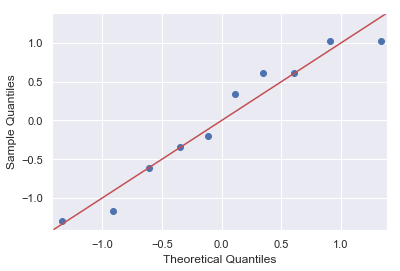

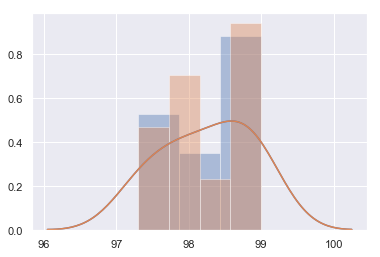

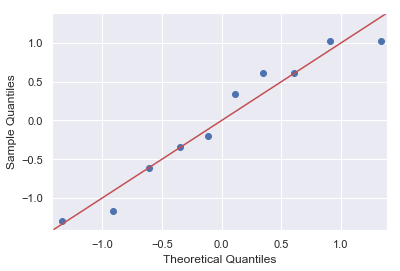

In [31]:
sns.distplot(df_small_sample, bins=3)
sns.distplot(df_small_sample, bins=4)
z = (df_small_sample-df_small_sample.mean())/sd
sm.qqplot(z,line='45')

From the above visualizations, we can assume that the distribution is approximately normal.


In [33]:
# Find t statistics
t_score= (df_small_sample.mean() - 98.6)/(df_small_sample.std()/np.sqrt(len(df_small_sample)))
crit_t=scipy.stats.t.ppf(0.05/2, len(df_small_sample)-1)
print('t score: ',t_score)
print('Critical t: ',crit_t)
temp_sem = df_small_sample.std()/(np.sqrt(len(df_small_sample)))
ci_width = crit_t * temp_sem
print('Confidence Interval:',[df_small_sample.mean() + ci_width, df_small_sample.mean() - ci_width])

t score:  -1.8694938172316853
Critical t:  -2.262157162740992
Confidence Interval: [97.82648696151787, 98.67351303848213]


<b>Conclusion from t-statistics </b><br>
As abs(t_score) < abs(crit_t), we cannot reject the null hypothesis. <br>
Moreover, 98.6 degree is within 95% confidence interval of the sample mean.
Hence, there is not enough evidence to suggest human body temeprature is different from 98.6. <br>

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. <br>
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. <br>

<b> Note </b> <br>
As we are finding the confidence interval and finding whether an <br>
individual's temperature can be considered abnormal, we will consider <br>
sample size as 1 while calculating the confidence interval. Intuitively, <br>
it is also true that the CI will narrow down when the sample size increase.

In [16]:
# Bootstrap approach
new_bs_reps = draw_bs_reps(df['temperature'], np.mean, size=10000)
t,p=scipy.stats.ttest_1samp(new_bs_reps, 98.6)
print('t value:',t)
print('p value:',p)

# Calculate confidence Interval
l,u=stats.norm.interval(0.95, loc=new_bs_reps.mean(), scale=new_bs_reps.std()/1)
margin_error=new_bs_reps.mean()-l
print('Mean Temperature: ',new_bs_reps.mean())
print('Margin Error:', margin_error)
print('Confidence Interval: ',[l,u])

('t value:', -547.58631365367273)
('p value:', 0.0)
('Mean Temperature: ', 98.248941846153855)
('Margin Error:', 0.12564721157835379)
('Confidence Interval: ', [98.123294634575501, 98.374589057732209])


In [17]:
#Frequentist Approach
temp_sem = df.temperature.std()/1.0
t_score= (df['temperature'].mean() - 98.6)/1.0
crit_t=scipy.stats.t.ppf(0.975, len(df.temperature)-1)
ci_width = crit_t * temp_sem
print(t_score)
print(crit_t)
print('Confidence Interval:',[df.temperature.mean() - ci_width, df.temperature.mean() + ci_width])
print('Margin Error:', abs(ci_width))

-0.350769230769
1.97852449146
('Confidence Interval:', [96.798609934325725, 99.699851604135773])
('Margin Error:', 1.4506208349050189)


<b> Conclusion </b> <br>
We can consider the temperature of a person to be abnormal when it is <br>
outside 95% confidence range [96.8, 99.69] of mean temperature of sample population <br>

## 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why? <br>
Write a story with your conclusion in the context of the original problem. <br>

In [35]:
df_males=df[df.gender=='M']
df_females=df[df.gender=='F']
display(df_males.info())
display(df_females.info())
diff_means=df_females.temperature.mean() - df_males.temperature.mean()
print('The obversations count in male dataset: ',len(df_males.temperature))
print('The mean of the male dataset: ',df_males.temperature.mean() )
print('The mean of the male dataset: ', df_males.temperature.std())

print('The obversations count in female dataset: ',len(df_females.temperature))
print('The mean of the female dataset: ', df_females.temperature.mean())
print('The mean of the female dataset: ', df_females.temperature.std())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


None

('The obversations count in male dataset: ', 65)
('The mean of the male dataset: ', 98.104615384615371)
('The mean of the male dataset: ', 0.69875576232659098)
('The obversations count in female dataset: ', 65)
('The mean of the female dataset: ', 98.393846153846141)
('The mean of the female dataset: ', 0.74348775273136636)


<b>Null Hypothesis </b> : There is no difference in the mean temeprature between men and women. <br>
<b>Alternate Hypothesis </b> : There is difference in the mean temeprature between men and women. <br>

As there are two samples, we will use two sample bootstrapping and two sample t-test for reaching the conclusion. <br>
More over, as each male and female dataset have sample size 65 (> 30), we can assume normality of their sample means <br>
as per the Central limit theorem. We will use z-statistics to arrive at our conclusion.

In [37]:
# Bootstrap Approach
df_males_shifted=df_males['temperature']-np.mean(df_males['temperature'])+np.mean(df['temperature'])
df_females_shifted=df_females['temperature']-np.mean(df_females['temperature'])+np.mean(df['temperature'])


bs_reps_males=draw_bs_reps(df_males_shifted, np.mean, size=10000)
bs_reps_females=draw_bs_reps(df_females_shifted, np.mean, size=10000)
bs_reps_difference= bs_reps_females - bs_reps_males

#Compute p-value
p = np.sum(bs_reps_difference >=diff_means)/float(len(bs_reps_difference))
p

0.012200000000000001

In [39]:
# Frequentist Approach

z = diff_means/ np.sqrt((df_males.temperature.std()**2)/len(df_males) + (df_females.temperature.std()**2)/len(df_females))
print(z)
p_value=stats.norm.cdf(z)*2
print(p_value)

2.28543453817
1.97771263924


From both the Bootstap and frequentist approach, we get p value < 0.05 and reject the null hypothesis. Hence, The body temperatures of men and women are not statistically same.

Next we check whether the mean body temperatures of females are different from the mean body temperatures of humans. <br>

<b>Null Hypothesis </b> : There is no difference in the mean temeprature between women and men+women combined <br>
<b>Alternate Hypothesis </b> : There is difference in the mean temeprature between women and men+women combined <br>


In [40]:
# Frequentist Approach

diff=df.temperature.mean() - df_females.temperature.mean()

z = diff/ np.sqrt((df.temperature.std()**2)/len(df) + (df_females.temperature.std()**2)/len(df_females))
print(z)
p_value=stats.norm.cdf(z)*2
print(p_value)

-1.28633306289
0.198326848319


<b> Conclusion </b>

From the above analysis, it is evident that the average body temperatures of men <br>
and women are different. In fact, average temperature for women are also statistically <br>
different from average temperature of all humans. The average body temperatures of (i) all humans,<br>
(ii) all men and (iii)all women are also different from 98.6

